Done:
- Hist for numerics, just to make sure nothing is amiss.
- Elapsed time in inquisit.
- Check if someone exploded all balloons; or vice versa.
- Calculated columns are correct (mean, std, range, etc.).
- Check "thirds"
- Check inquisit columns (total pumps, avg pumps, etc.)

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', 2000)
%matplotlib inline
dmt = pd.read_csv('./data/DMT_Data_Merged_10.25.17.csv')
#dmt = pd.read_csv('../data/final_data/DMT_Data_Merged_10.25.17.csv')

## Sage

In [57]:
def col_convert(row):
    '''
    Convert a column that contains a string of a list of strings, into a list of floats.  
    
    Inputs
        row: a string of a list of strings.
        
    Output
        returns a list of floats
    
    '''
    if pd.notnull(row):
        return [float(x) for x in row.strip('[]').split(',')]
    
    else:
        return row

In [64]:
def check_bart(name):
    pumps = dmt[name + '___pumps_per_balloon'].apply(col_convert).dropna()
    pumps_mean = dmt[name + '___pumps_mean'].dropna()
    pumps_std = dmt[name + '___pumps_standard_deviation'].dropna()
    pumps_range = dmt[name + '___pumps_range'].dropna()
    
    #Confirm means, std, ranges are calculated correctly.
    means = all(np.isclose(pumps.apply(np.mean), pumps_mean, equal_nan=True))
    stds = all(np.isclose(pumps.apply(np.std), pumps_std, equal_nan=True))
    ranges = all(np.isclose(pumps.apply(np.ptp), pumps_range, equal_nan=True))

    print('Means are correct:', means)
    print('Ranges are correct:', ranges)
    print('Standard deviations are correct:', stds)

In [59]:
def split(row, segment):
    seg = 0, 5
    
    if segment == 2:
        seg = 5, 10
    elif segment == 3:
        seg = 10, 15
        
    return row[seg[0]:seg[1]]
    
    
def check_thirds(name):
    pumps = dmt[name + '___pumps_per_balloon'].apply(col_convert).dropna()

    means = all([
        all(np.isclose(pumps.apply(lambda x: split(x, 1)).apply(np.mean), 
                       dmt[name + '___pumps_mean_first_third'].dropna())),
        all(np.isclose(pumps.apply(lambda x: split(x, 2)).apply(np.mean), 
                       dmt[name + '___pumps_mean_second_third'].dropna())),
        all(np.isclose(pumps.apply(lambda x: split(x, 3)).apply(np.mean), 
                       dmt[name + '___pumps_mean_last_third'].dropna()))
    ])
    
    ranges = all([
        all(np.isclose(pumps.apply(lambda x: split(x, 1)).apply(np.ptp), 
                       dmt[name + '___pumps_range_first_third'].dropna())),
        all(np.isclose(pumps.apply(lambda x: split(x, 2)).apply(np.ptp), 
                       dmt[name + '___pumps_range_second_third'].dropna())),
        all(np.isclose(pumps.apply(lambda x: split(x, 3)).apply(np.ptp), 
                       dmt[name + '___pumps_range_last_third'].dropna()))
    ])
    
    stds = all([
        all(np.isclose(pumps.apply(lambda x: split(x, 1)).apply(np.std), 
                       dmt[name + '___pumps_standard_deviation_first_third'].dropna())),
        all(np.isclose(pumps.apply(lambda x: split(x, 2)).apply(np.std), 
                       dmt[name + '___pumps_standard_deviation_second_third'].dropna())),
        all(np.isclose(pumps.apply(lambda x: split(x, 3)).apply(np.std), 
                       dmt[name + '___pumps_standard_deviation_last_third'].dropna()))
    ])  
    
    return means, ranges, stds

In [60]:
def describe_bart(name):
    columns = [
        '___max_pumps_per_balloon',
        '___mean_pumps_after_explode',
        '___mean_pumps_after_no_explode',
        '___number_of_explosions',
        '___pumps_mean',
        '___pumps_range',
        '___pumps_standard_deviation',
        '___total_gains'
    ]
    
    for col in columns:
        print(col[3:])
        print(dmt[name + col].describe())
        dmt[name + col].plot.hist(title=col[3:])
        plt.show()
        print()

In [65]:
check_bart('SAGE_bart_v4_baseline_BART0.25')

Means are correct: True
Ranges are correct: True
Standard deviations are correct: False


In [66]:
#Means, Ranges, Stds
check_thirds('SAGE_bart_v4_baseline_BART0.25')

(True, True, False)

max_pumps_per_balloon
count    102.000000
mean       9.392157
std        1.611572
min        2.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       12.000000
Name: SAGE_bart_v4_baseline_BART0.25___max_pumps_per_balloon, dtype: float64


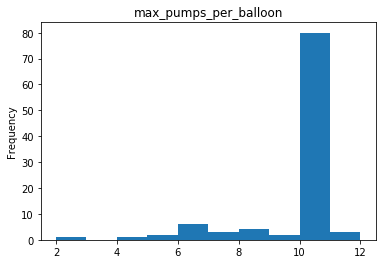


mean_pumps_after_explode
count    102.000000
mean       3.912852
std        1.327006
min        1.500000
25%        3.000000
50%        3.775000
75%        4.600000
max        7.428571
Name: SAGE_bart_v4_baseline_BART0.25___mean_pumps_after_explode, dtype: float64


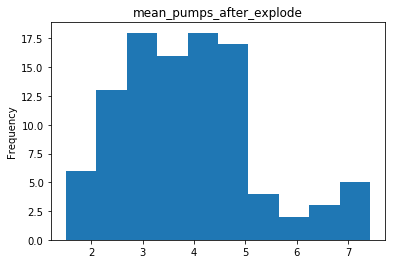


mean_pumps_after_no_explode
count    102.000000
mean       4.421378
std        1.443180
min        1.615385
25%        3.300000
50%        4.225000
75%        5.372159
max        8.600000
Name: SAGE_bart_v4_baseline_BART0.25___mean_pumps_after_no_explode, dtype: float64


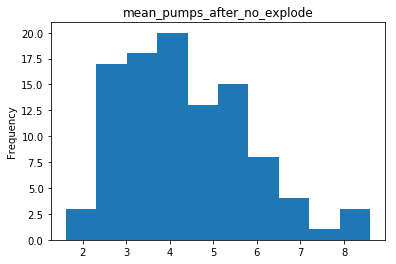


number_of_explosions
count    102.000000
mean       5.617647
std        2.647787
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       15.000000
Name: SAGE_bart_v4_baseline_BART0.25___number_of_explosions, dtype: float64


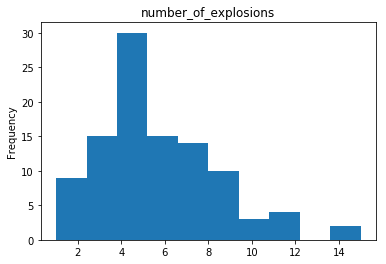


pumps_mean
count    102.000000
mean       4.238562
std        1.265413
min        1.666667
25%        3.216667
50%        4.133333
75%        5.000000
max        7.733333
Name: SAGE_bart_v4_baseline_BART0.25___pumps_mean, dtype: float64


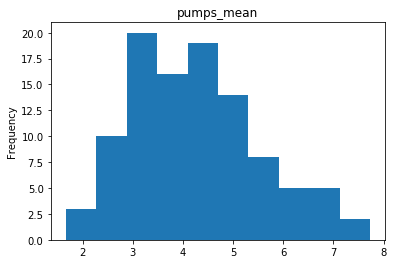


pumps_range
count    102.000000
mean       5.058824
std        2.464896
min        1.000000
25%        3.000000
50%        4.500000
75%        7.000000
max       11.000000
Name: SAGE_bart_v4_baseline_BART0.25___pumps_range, dtype: float64


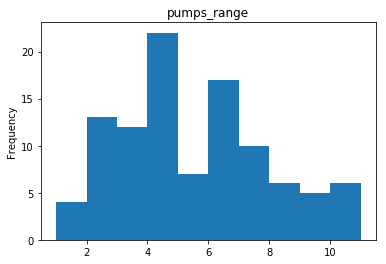


pumps_standard_deviation
count    102.000000
mean       1.462368
std        0.700274
min        0.400000
25%        0.902105
50%        1.347131
75%        1.896892
max        3.473711
Name: SAGE_bart_v4_baseline_BART0.25___pumps_standard_deviation, dtype: float64


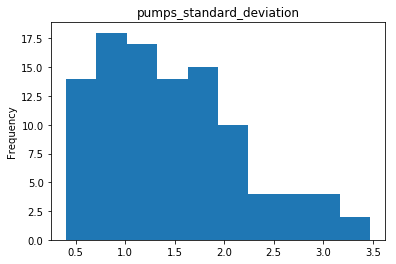


total_gains
count    102.000000
mean       9.727941
std        2.902522
min        0.000000
25%        8.000000
50%        9.750000
75%       11.500000
max       17.000000
Name: SAGE_bart_v4_baseline_BART0.25___total_gains, dtype: float64


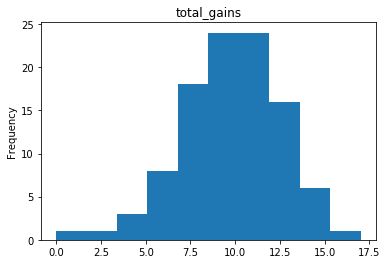

In [67]:
describe_bart('SAGE_bart_v4_baseline_BART0.25')

In [68]:
check_bart('SAGE_bart_v4_baseline_BART250.00')

Means are correct: True
Ranges are correct: True
Standard deviations are correct: False


In [69]:
check_thirds('SAGE_bart_v4_baseline_BART250.00')

(True, True, False)

max_pumps_per_balloon
count    101.000000
mean       9.326733
std        1.766969
min        2.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       12.000000
Name: SAGE_bart_v4_baseline_BART250.00___max_pumps_per_balloon, dtype: float64


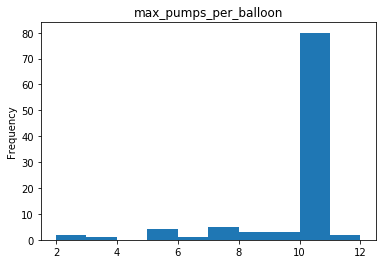


mean_pumps_after_explode
count    101.000000
mean       3.505909
std        1.534367
min        0.000000
25%        2.400000
50%        3.333333
75%        4.333333
max        7.625000
Name: SAGE_bart_v4_baseline_BART250.00___mean_pumps_after_explode, dtype: float64


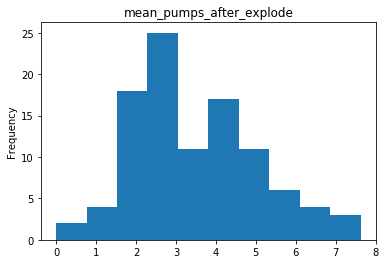


mean_pumps_after_no_explode
count    101.000000
mean       3.962925
std        1.499654
min        1.357143
25%        2.857143
50%        3.636364
75%        5.000000
max        9.000000
Name: SAGE_bart_v4_baseline_BART250.00___mean_pumps_after_no_explode, dtype: float64


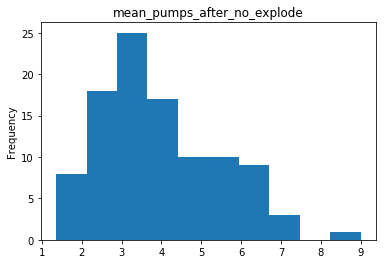


number_of_explosions
count    101.000000
mean       4.900990
std        2.628707
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       14.000000
Name: SAGE_bart_v4_baseline_BART250.00___number_of_explosions, dtype: float64


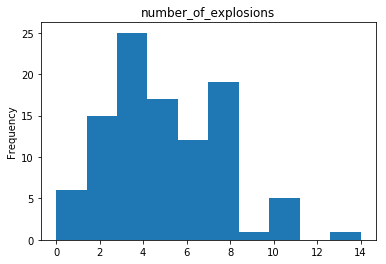


pumps_mean
count    101.000000
mean       3.838944
std        1.380025
min        1.400000
25%        2.800000
50%        3.600000
75%        4.800000
max        8.066667
Name: SAGE_bart_v4_baseline_BART250.00___pumps_mean, dtype: float64


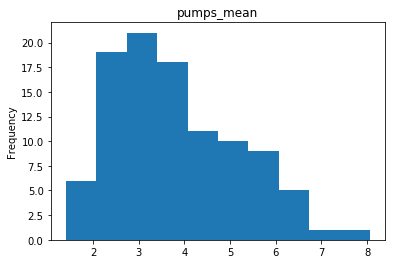


pumps_range
count    101.000000
mean       4.287129
std        2.224125
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: SAGE_bart_v4_baseline_BART250.00___pumps_range, dtype: float64


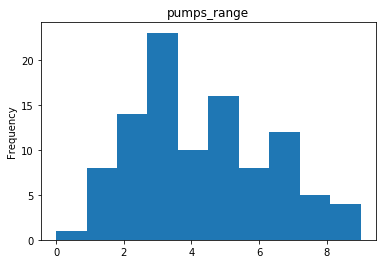


pumps_standard_deviation
count    101.000000
mean       1.284893
std        0.667301
min        0.000000
25%        0.771722
50%        1.123487
75%        1.730767
max        3.067495
Name: SAGE_bart_v4_baseline_BART250.00___pumps_standard_deviation, dtype: float64


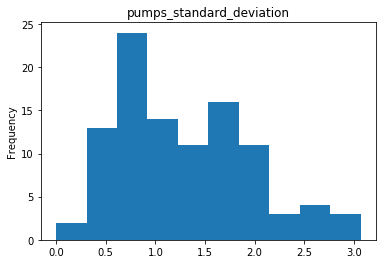


total_gains
count      101.000000
mean      9472.772277
std       2858.736826
min        750.000000
25%       7250.000000
50%       9250.000000
75%      11750.000000
max      16250.000000
Name: SAGE_bart_v4_baseline_BART250.00___total_gains, dtype: float64


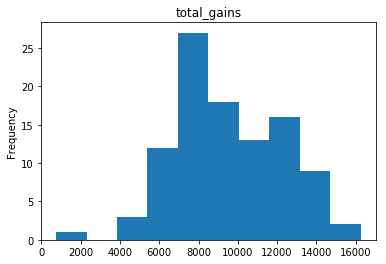

In [70]:
describe_bart('SAGE_bart_v4_baseline_BART250.00')

In [71]:
check_bart('SAGE_bart_v4_21_day_assessment_BART0.25')

Means are correct: True
Ranges are correct: True
Standard deviations are correct: False


In [72]:
check_thirds('SAGE_bart_v4_21_day_assessment_BART0.25')

(True, True, False)

max_pumps_per_balloon
count    95.000000
mean      9.326316
std       1.841843
min       2.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      14.000000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___max_pumps_per_balloon, dtype: float64


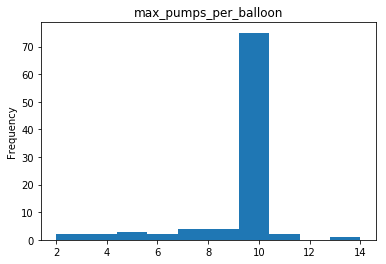


mean_pumps_after_explode
count    95.000000
mean      3.973621
std       1.428847
min       0.000000
25%       3.000000
50%       4.000000
75%       4.666667
max       7.600000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___mean_pumps_after_explode, dtype: float64


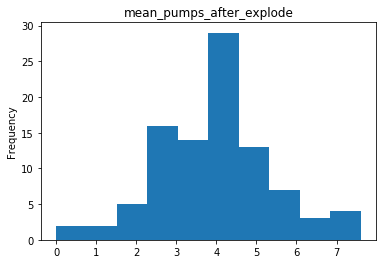


mean_pumps_after_no_explode
count    95.000000
mean      4.253741
std       1.419863
min       1.000000
25%       3.316667
50%       4.181818
75%       5.140909
max       8.714286
Name: SAGE_bart_v4_21_day_assessment_BART0.25___mean_pumps_after_no_explode, dtype: float64


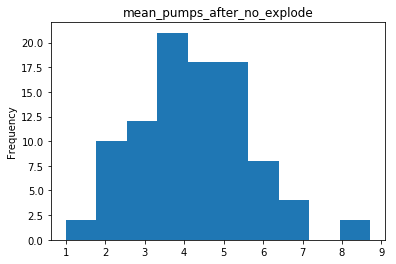


number_of_explosions
count    95.000000
mean      5.326316
std       2.730607
min       0.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      14.000000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___number_of_explosions, dtype: float64


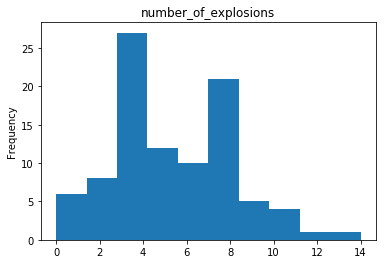


pumps_mean
count    95.000000
mean      4.159298
std       1.267611
min       1.000000
25%       3.366667
50%       4.133333
75%       5.000000
max       7.266667
Name: SAGE_bart_v4_21_day_assessment_BART0.25___pumps_mean, dtype: float64


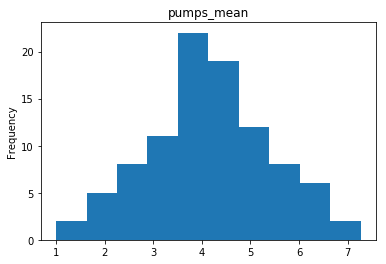


pumps_range
count    95.000000
mean      4.484211
std       2.082670
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      12.000000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___pumps_range, dtype: float64


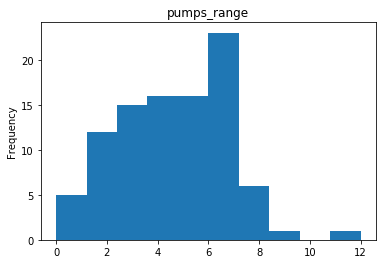


pumps_standard_deviation
count    95.000000
mean      1.340096
std       0.605892
min       0.000000
25%       0.869092
50%       1.290994
75%       1.707405
max       3.534860
Name: SAGE_bart_v4_21_day_assessment_BART0.25___pumps_standard_deviation, dtype: float64


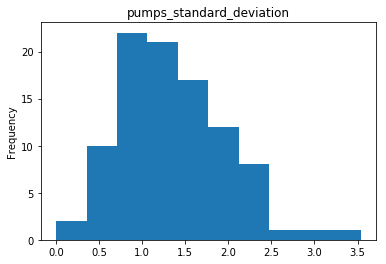


total_gains
count    95.00000
mean     10.10000
std       3.12301
min       0.75000
25%       8.00000
50%      10.00000
75%      11.75000
max      19.50000
Name: SAGE_bart_v4_21_day_assessment_BART0.25___total_gains, dtype: float64


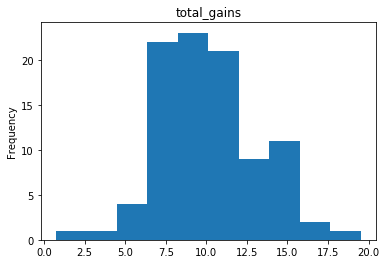

In [73]:
describe_bart('SAGE_bart_v4_21_day_assessment_BART0.25')

In [74]:
check_bart('SAGE_bart_v4_21_day_assessment_BART250.00')

Means are correct: True
Ranges are correct: True
Standard deviations are correct: False


In [75]:
check_thirds('SAGE_bart_v4_21_day_assessment_BART250.00')

(True, True, False)

max_pumps_per_balloon
count    94.000000
mean      9.148936
std       1.917421
min       2.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      11.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___max_pumps_per_balloon, dtype: float64


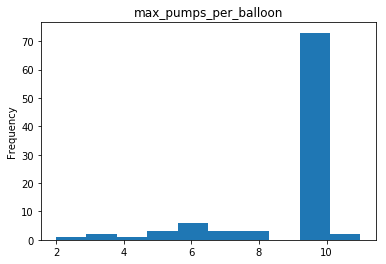


mean_pumps_after_explode
count    94.000000
mean      3.744931
std       1.358809
min       0.000000
25%       3.000000
50%       3.708333
75%       4.500000
max       7.250000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___mean_pumps_after_explode, dtype: float64


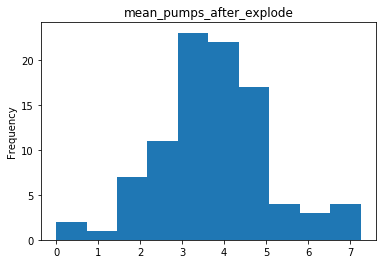


mean_pumps_after_no_explode
count    94.000000
mean      3.952317
std       1.129214
min       1.571429
25%       3.279545
50%       3.923077
75%       4.656250
max       7.166667
Name: SAGE_bart_v4_21_day_assessment_BART250.00___mean_pumps_after_no_explode, dtype: float64


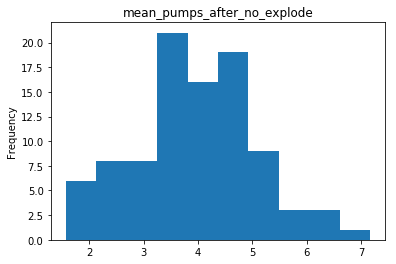


number_of_explosions
count    94.000000
mean      4.691489
std       2.561193
min       0.000000
25%       3.000000
50%       4.500000
75%       6.000000
max      12.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___number_of_explosions, dtype: float64


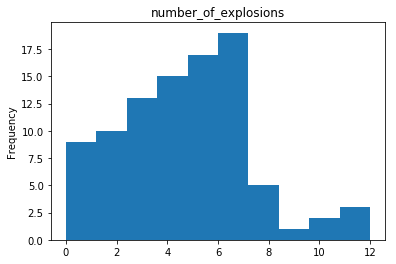


pumps_mean
count    94.000000
mean      3.907801
std       1.079630
min       1.533333
25%       3.083333
50%       3.933333
75%       4.533333
max       7.066667
Name: SAGE_bart_v4_21_day_assessment_BART250.00___pumps_mean, dtype: float64


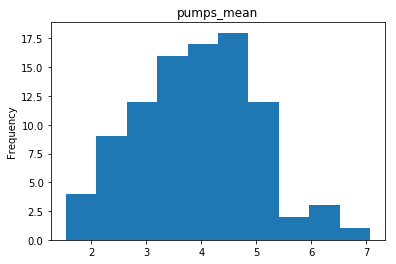


pumps_range
count    94.000000
mean      4.042553
std       1.825241
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___pumps_range, dtype: float64


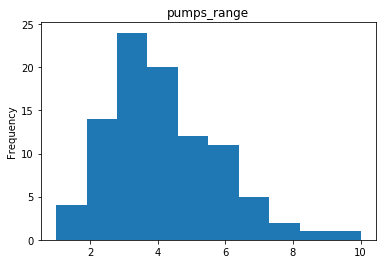


pumps_standard_deviation
count    94.000000
mean      1.218203
std       0.557877
min       0.258199
25%       0.805536
50%       1.160445
75%       1.520939
max       3.514595
Name: SAGE_bart_v4_21_day_assessment_BART250.00___pumps_standard_deviation, dtype: float64


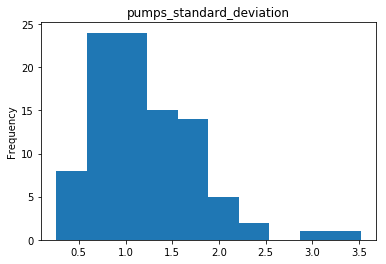


total_gains
count       94.000000
mean     10021.276596
std       2608.314759
min       3000.000000
25%       8500.000000
50%      10000.000000
75%      12000.000000
max      17500.000000
Name: SAGE_bart_v4_21_day_assessment_BART250.00___total_gains, dtype: float64


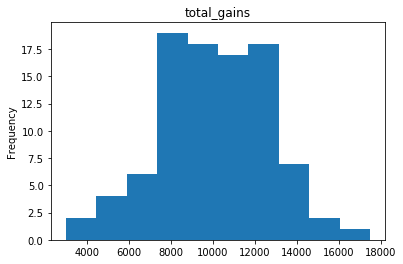

In [76]:
describe_bart('SAGE_bart_v4_21_day_assessment_BART250.00')

## Inquisit

In [103]:
#Thirds: total pumps
np.all(
    dmt['INQUISIT_bart___values.totalpumpcount'].dropna() == \
    dmt['INQUISIT_bart___values.totalpumpcount_10'].dropna() + \
    dmt['INQUISIT_bart___values.totalpumpcount_20'].dropna() + \
    dmt['INQUISIT_bart___values.totalpumpcount_30'].dropna()
)

True

In [106]:
#Thirds: average pump counts
all(
    np.isclose(dmt['INQUISIT_bart___values.averagepumpcount'].dropna(),
   (dmt['INQUISIT_bart___values.averagepumpcount_10'].dropna() + \
    dmt['INQUISIT_bart___values.averagepumpcount_20'].dropna() + \
    dmt['INQUISIT_bart___values.averagepumpcount_30'].dropna()) / 3)
)

True

In [107]:
#Thirds: total explosions
np.all(
    dmt['INQUISIT_bart___values.total_explosions'].dropna() == \
    dmt['INQUISIT_bart___values.total_explosions_10'].dropna() + \
    dmt['INQUISIT_bart___values.total_explosions_20'].dropna() + \
    dmt['INQUISIT_bart___values.total_explosions_30'].dropna()
)

True

In [108]:
#Thirds: total non explosions
np.all(
    dmt['INQUISIT_bart___values.nonexplodedballoons'].dropna() == \
    dmt['INQUISIT_bart___values.nonexplodedballoons_10'].dropna() + \
    dmt['INQUISIT_bart___values.nonexplodedballoons_20'].dropna() + \
    dmt['INQUISIT_bart___values.nonexplodedballoons_30'].dropna()
)

True

In [109]:
#Thirds: adjusted total pumps
np.all(
    dmt['INQUISIT_bart___values.adjustedtotalpumpcount'].dropna() == \
    dmt['INQUISIT_bart___values.adjustedtotalpumpcount_10'].dropna() + \
    dmt['INQUISIT_bart___values.adjustedtotalpumpcount_20'].dropna() + \
    dmt['INQUISIT_bart___values.adjustedtotalpumpcount_10'].dropna()
)

True

In [114]:
#Thirds: adjusted average pumps
all(
    np.isclose(dmt['INQUISIT_bart___values.adjustedaveragepumpcount'].dropna(),
   (dmt['INQUISIT_bart___values.adjustedaveragepumpcount_10'].dropna() + \
    dmt['INQUISIT_bart___values.adjustedaveragepumpcount_20'].dropna() + \
    dmt['INQUISIT_bart___values.adjustedaveragepumpcount_30'].dropna()) / 3)
)

False

In [128]:
#Check average pump count.
all(
    np.isclose(dmt['INQUISIT_bart___values.averagepumpcount'].dropna(), dmt['INQUISIT_bart___values.totalpumpcount'].dropna() / 30)
)

True

In [ ]:
#Check exploded + nonexploded balloons.
all(
    dmt['INQUISIT_bart___values.nonexplodedballoons'].dropna() + \
    dmt['INQUISIT_bart___values.total_explosions'].dropna() == 30
)

count     114.000000
mean      679.763158
std       423.930937
min        29.000000
25%       331.000000
50%       591.000000
75%       947.750000
max      2094.000000
Name: INQUISIT_bart___values.totalpumpcount, dtype: float64


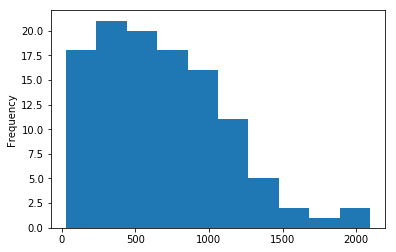

count    114.000000
mean      22.658772
std       14.131031
min        0.966667
25%       11.033333
50%       19.700000
75%       31.591667
max       69.800000
Name: INQUISIT_bart___values.averagepumpcount, dtype: float64


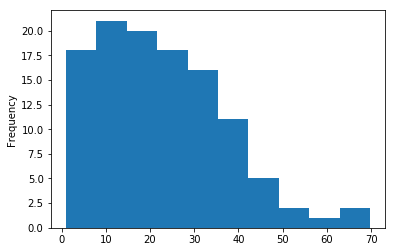

count    114.000000
mean       6.552632
std        5.247995
min        0.000000
25%        3.000000
50%        5.000000
75%        8.750000
max       30.000000
Name: INQUISIT_bart___values.total_explosions, dtype: float64


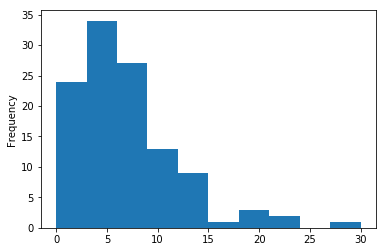

In [130]:
cols = ['INQUISIT_bart___values.totalpumpcount',
        'INQUISIT_bart___values.averagepumpcount',
        'INQUISIT_bart___values.total_explosions']

for col in cols:
    print(dmt[col].describe())
    dmt[col].plot.hist()
    plt.show()


### Elapsed Time:
The mean elapsed time for inquisit BART is about ~7 minutes.  There is a long rightward skew in the histogram, with a maximum of 23.7 minutes.  I would remove the maximum case.

In [4]:
#Times shown in minutes.
def conv_elapsed(row):
    if pd.notnull(row) and ':' in row:
        return np.nan
    elif pd.notnull(row):
        return float(row)
    else:
        return np.nan

bart_elapsed = dmt['INQUISIT_bart___script.elapsedtime'].apply(conv_elapsed).dropna() #Convert to minutes
bart_elapsed.describe() 

count         84.000000
mean      419011.761905
std       205268.382333
min       122015.000000
25%       275602.500000
50%       411183.500000
75%       473788.500000
max      1423162.000000
Name: INQUISIT_bart___script.elapsedtime, dtype: float64

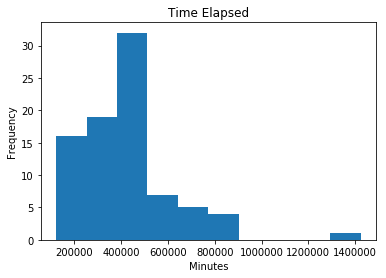

In [5]:
pd.Series(bart_elapsed).plot.hist(title = 'Time Elapsed')
plt.xlabel('Minutes')

## Both Sage & Inquisit

In [77]:
balloons_1 = dmt['SAGE_bart_v4_baseline_BART0.25___number_of_balloons']
explosions_1 = dmt['SAGE_bart_v4_baseline_BART0.25___number_of_explosions']

balloons_2 = dmt['SAGE_bart_v4_baseline_BART250.00___number_of_balloons']
explosions_2 = dmt['SAGE_bart_v4_baseline_BART250.00___number_of_explosions']

balloons_3 = dmt['SAGE_bart_v4_21_day_assessment_BART0.25___number_of_balloons']
explosions_3 = dmt['SAGE_bart_v4_21_day_assessment_BART0.25___number_of_explosions']

balloons_4 = dmt['SAGE_bart_v4_21_day_assessment_BART250.00___number_of_balloons']
explosions_4 = dmt['SAGE_bart_v4_21_day_assessment_BART250.00___number_of_explosions']

balloons_5 = dmt['INQUISIT_bart___values.ballooncount']
explosions_5 = dmt['INQUISIT_bart___values.total_explosions']

balloons = balloons_1 + balloons_2 + balloons_3 + balloons_4 + balloons_5
explosions = explosions_1 + explosions_2 + explosions_3 + explosions_4 + explosions_5

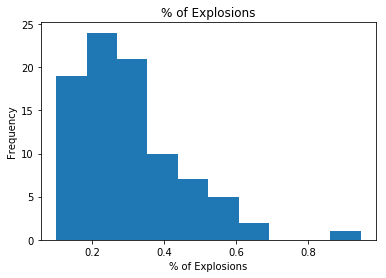

In [19]:
pd.Series(explosions / balloons).plot.hist(title = '% of Explosions')
plt.xlabel('% of Explosions')

In [84]:
(explosions / balloons).sort_values().dropna()

12     0.100000
71     0.100000
73     0.100000
94     0.100000
34     0.100000
58     0.122222
17     0.122222
90     0.133333
47     0.133333
30     0.144444
10     0.144444
48     0.144444
99     0.166667
55     0.166667
41     0.166667
102    0.166667
21     0.166667
42     0.177778
77     0.177778
76     0.188889
84     0.188889
46     0.211111
67     0.211111
3      0.222222
6      0.222222
39     0.222222
15     0.233333
87     0.233333
22     0.233333
57     0.233333
         ...   
5      0.322222
28     0.333333
49     0.344444
81     0.344444
13     0.344444
44     0.355556
31     0.355556
16     0.366667
40     0.377778
4      0.388889
54     0.400000
74     0.400000
66     0.400000
24     0.411111
32     0.433333
36     0.444444
83     0.455556
50     0.466667
86     0.477778
25     0.477778
60     0.488889
85     0.511111
93     0.522222
96     0.522222
19     0.566667
82     0.566667
8      0.600000
18     0.622222
56     0.644444
9      0.944444
dtype: float64